<a href="https://colab.research.google.com/github/drscicomm/food-security/blob/main/Vader_Sentiment_Analysis_ML_corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
# upload file
from google.colab import files
uploaded = files.upload()

Saving text.xlsx to text.xlsx


In [1]:
# Load libraries
import pandas as pd

In [2]:
# Read data into 'data' dataframe
data = pd.read_excel('/content/text.xlsx')
data.head()

,author,year,paper_text,index
0,Madichetty,2020,Social media platform like Twitter is one of t...,0
1,Eyre,2021,Background: Achieving food security remains a ...,1
2,Gadzalo,2020,\n\nAbstract\nThe methodological approach for ...,2
3,Nica-Avram 2021,2021,\nFood insecurity in the UK has captured publi...,3
4,Shi,2021,\n\nis only making things worse [22]. Even aft...,4


Data Preprocessing

In [3]:
del data['index']

In [4]:
data = data.dropna(subset=['paper_text'])

In [5]:
# Load the regular expression library
import re

# Remove punctuation
data['paper_text_processed'] = \
data['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
data['paper_text_processed'] = \
data['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
data['paper_text_processed'].head()

0    social media platform like twitter is one of t...
1    background: achieving food security remains a ...
2    \n\nabstract\nthe methodological approach for ...
3    \nfood insecurity in the uk has captured publi...
4    \n\nis only making things worse [22] even afte...
Name: paper_text_processed, dtype: object

Set up Vader libraries

In [6]:
pip install vaderSentiment

In [7]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Calculate sentiment scores per document and add to dataframe

Analysis on un-preprocessed text

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Calculating scores and adding to dataframe
sentiment = data['paper_text'].apply(lambda x: sid.polarity_scores(x))
data = pd.concat([data,sentiment.apply(pd.Series)],1)
data.head()

,author,year,paper_text,paper_text_processed,neg,neu,pos,compound
0,Madichetty,2020,Social media platform like Twitter is one of t...,social media platform like twitter is one of t...,0.062,0.890,0.048,-0.9974
1,Eyre,2021,Background: Achieving food security remains a ...,background: achieving food security remains a ...,0.039,0.878,0.084,0.9997
2,Gadzalo,2020,\n\nAbstract\nThe methodological approach for ...,\n\nabstract\nthe methodological approach for ...,0.052,0.868,0.080,0.9996
3,Nica-Avram 2021,2021,\nFood insecurity in the UK has captured publi...,\nfood insecurity in the uk has captured publi...,0.100,0.807,0.092,-0.9849
4,Shi,2021,\n\nis only making things worse [22]. Even aft...,\n\nis only making things worse [22] even afte...,0.049,0.810,0.141,0.9999


In [10]:
# Analyzing scores
data.describe()

,year,neg,neu,pos,compound
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2018.571429,0.059143,0.843893,0.097000,0.428789
std,2.098122,0.037738,0.046544,0.041875,0.909651
min,2014.000000,0.000000,0.748000,0.048000,-0.999300
25%,2018.000000,0.037000,0.810000,0.071000,-0.946250
50%,2019.000000,0.050500,0.856500,0.084500,0.994750
75%,2020.000000,0.070000,0.879250,0.113250,0.999700
max,2021.000000,0.184000,0.907000,0.228000,0.999900


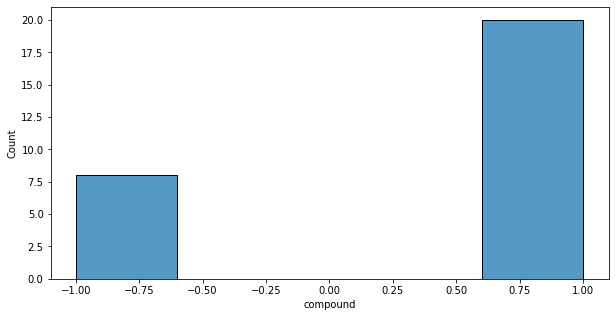

In [34]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.histplot(data['compound'], bins=5, ax=ax)
plt.show()

In [23]:
data['sentiment_type']=''
data.loc[data.compound>0,'sentiment_type']='POSITIVE'
data.loc[data.compound==0,'sentiment_type']='NEUTRAL'
data.loc[data.compound<0,'sentiment_type']='NEGATIVE'

In [28]:
data.head()

,author,year,paper_text,paper_text_processed,neg,neu,pos,compound,sentiment_type
0,Madichetty,2020,Social media platform like Twitter is one of t...,social media platform like twitter is one of t...,0.062,0.890,0.048,-0.9974,NEGATIVE
1,Eyre,2021,Background: Achieving food security remains a ...,background: achieving food security remains a ...,0.039,0.878,0.084,0.9997,POSITIVE
2,Gadzalo,2020,\n\nAbstract\nThe methodological approach for ...,\n\nabstract\nthe methodological approach for ...,0.052,0.868,0.080,0.9996,POSITIVE
3,Nica-Avram 2021,2021,\nFood insecurity in the UK has captured publi...,\nfood insecurity in the uk has captured publi...,0.100,0.807,0.092,-0.9849,NEGATIVE
4,Shi,2021,\n\nis only making things worse [22]. Even aft...,\n\nis only making things worse [22] even afte...,0.049,0.810,0.141,0.9999,POSITIVE


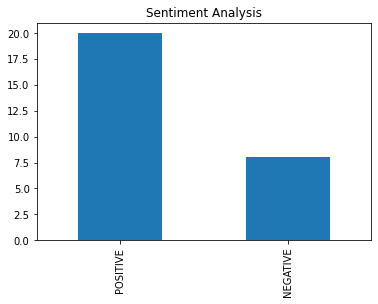

In [40]:
data.sentiment_type.value_counts().plot(kind='bar',title="Sentiment Analysis")

Text(0, 0.5, 'Frequency')

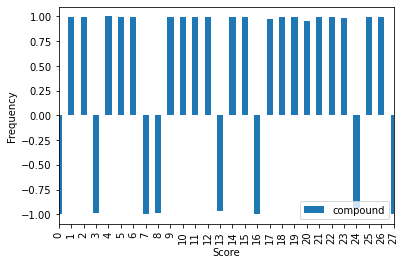

In [39]:
# Draw a graph with pandas 
ax = data.plot(kind='bar', y='compound')

# Set the x scale because otherwise it goes into weird negative numbers
ax.set_xlim((0, 27))

# Set the x-axis label
ax.set_xlabel("Score")

# Set the y-axis label
ax.set_ylabel("Frequency")

In [31]:
data.to_excel('sentiment_scores.xlsx')